In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

In [ ]:
def tokenize_feedback(corpus):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  total_words = len(tokenizer.word_index) + 1
  return tokenizer, total_words

In [ ]:
df = pd.read_csv('feedback_dataset.csv')

In [ ]:
df

,sao_pos,sao_neg,ca_pos,ca_neg,gas_pos,gas_neg,cor_pos,cor_neg
0,"Struktur dan organisasi tulisan sangat baik, d...",Struktur dan organisasi tulisan perlu ditingka...,Analisis konten sangat mendalam dan mencermink...,"Analisis konten terlalu umum, memerlukan kedal...",Penggunaan bahasa sangat tepat dan memperkuat ...,Beberapa kesalahan tata bahasa dan ejaan dapat...,"Hubungan yang kuat antara struktur, analisis k...","Kekurangan keterkaitan antara struktur, analis..."
1,"Penyusunan paragraf dan kalimat sangat jelas, ...",Penyusunan kalimat dan paragraf tidak konsiste...,"Penggunaan kata benda, kata kerja, kata ketera...",Kekurangan kata benda dan kata kerja menyebabk...,"Kesalahan ejaan dan tata bahasa minimal, menin...","Penggunaan bahasa kurang tepat, mengakibatkan ...","Relevansi konten terhadap topik sangat tinggi,...",Beberapa bagian esai kurang relevan dan dapat ...
2,Struktur kalimat menunjukkan pemahaman yang ku...,Kesalahan dalam pengorganisasian kalimat membu...,Jumlah kata benda dan kata kerja yang digunaka...,Beberapa aspek analisis konten terkesan dangka...,Bahasa yang digunakan sangat bersih dan profes...,Beberapa kesalahan tata bahasa mengurangi keje...,"Keseimbangan antara struktur, analisis konten,...",Tidak adanya hubungan yang kuat antara struktu...
3,Penggunaan kata-kata dan kalimat sangat kohesi...,"Hubungan antara ide-ide terasa terputus-putus,...","Penggunaan kata-kata sangat cerdas dan tepat, ...",Terdapat ketidakseimbangan dalam penggunaan ka...,Struktur kalimat dan pemilihan kata-kata menun...,"Struktur kalimat kurang konsisten, memerlukan ...","Setiap bagian esai saling mendukung, menciptak...","Keterkaitan antara struktur, analisis konten, ..."
4,"Pemilihan struktur teks sangat tepat, memberik...","Struktur esai kurang jelas, mengakibatkan hila...",Pemahaman yang kuat terhadap materi tercermin ...,"Analisis konten kurang mendalam, menghasilkan ...","Kesalahan tata bahasa sangat sedikit, memberik...",Kesalahan tata bahasa yang terulang dapat meng...,Relevansi konten yang tinggi menciptakan esai ...,Relevansi konten yang kurang dapat menyebabkan...
...,...,...,...,...,...,...,...,...
115,"""Penggunaan struktur yang cerdas membuat esaim...",Kesimpulan esaimu tidak memberikan rangkuman y...,"""Analisis kontenmu sangat mendalam; pemilihan ...","""Pemilihan kata-katamu terasa kurang variatif,...","""Kemahiranmu dalam tata bahasa sangat terlihat...","""Esaimu memerlukan perhatian lebih terhadap ta...","""Esaimu berhasil menggabungkan struktur yang b...","""Relevansi antara struktur, analisis konten, d..."
116,"""Esaimu terorganisir dengan baik, dengan setia...",Esaimu tidak menggunakan format yang konsisten...,"""Pilihan kata-katamu sangat cerdas, menciptaka...","""Analisis konten esaimu memerlukan perhatian l...","""Penggunaan bahasa dan tata bahasa yang presis...","""Terdapat beberapa kesalahan tata bahasa dalam...","""Kesesuaian antara struktur, analisis konten, ...","""Kesalahan dalam relevansi antara struktur dan..."
117,"""Tulisanmu terstruktur rapi, menciptakan perja...",Esaimu memiliki kesalahan tata letak yang dapa...,"""Esaimu mencerminkan pemahaman yang mendalam t...","""Penggunaan kata benda, kata kerja, kata keter...","""Esaimu sangat terjaga dari kesalahan tata bah...","""Penggunaan tata bahasa dalam esaimu perlu dip...","""Pemilihan kata dan susunan ide-ide dalam esai...","""Kurangnya keterkaitan antara struktur dan ana..."
118,"""Struktur esaimu sangat terencana, menciptakan...","Struktur esaimu terlalu monoton, kehilangan di...","""Penggunaan variasi kata yang cerdas menciptak...","""Ketidakseimbangan dalam variasi kata-kata mem...","""Penggunaan kata-kata dan struktur kalimatmu s...","""Beberapa kesalahan gramatikal memengaruhi kes...","""Keterkaitan yang baik antara struktur tulisan...","""Relevansi yang kurang antara elemen-elemen ut..."


## **Convert Dataset Columns to String Lists**

In [ ]:
corpus_content_analysis_pos = df['ca_pos'].astype(str).tolist()
corpus_content_analysis_neg = df['ca_neg'].astype(str).tolist()

In [ ]:
corpus_content_analysis_neg

['Analisis konten terlalu umum, memerlukan kedalaman yang lebih besar dalam penyajian ide-ide.',
 'Kekurangan kata benda dan kata kerja menyebabkan analisis konten terasa terbatas.',
 'Beberapa aspek analisis konten terkesan dangkal dan kurang memberikan informasi yang substansial.',
 'Terdapat ketidakseimbangan dalam penggunaan kata-kata, mengakibatkan kelemahan dalam ekspresi ide-ide.',
 'Analisis konten kurang mendalam, menghasilkan kesan pemahaman yang terbatas terhadap materi.',
 'Kurangnya kedalaman dalam analisis konten membuat esai kurang meyakinkan.',
 'Keterbatasan penggunaan kata-kata mengurangi keberagaman dalam penjelasan ide.',
 'Beberapa aspek analisis konten perlu diperdalam untuk memberikan wawasan yang lebih mendalam.',
 'Kesalahan dalam pemilihan kata-kata mengurangi efektivitas analisis konten.',
 'Kurangnya ketelitian dalam menganalisis konten menyebabkan kelemahan dalam argumen.',
 'Isi esaimu perlu diperkaya dengan informasi yang lebih relevan.',
 'Argumen esaimu

In [ ]:
corpus_structure_and_organization_pos = df['sao_pos'].astype(str).tolist()
corpus_structure_and_organization_neg = df['sao_neg'].astype(str).tolist()

In [ ]:
corpus_grammar_and_language_pos = df['gas_pos'].astype(str).tolist()
corpus_grammar_and_language_neg = df['gas_neg'].astype(str).tolist()

In [ ]:
corpus_grammar_and_language_neg

['Beberapa kesalahan tata bahasa dan ejaan dapat memengaruhi pemahaman pembaca terhadap esai.',
 'Penggunaan bahasa kurang tepat, mengakibatkan kebingungan dalam menyampaikan ide.',
 'Beberapa kesalahan tata bahasa mengurangi kejelasan dan keberlanjutan tulisan.',
 'Struktur kalimat kurang konsisten, memerlukan perhatian ekstra terhadap tata bahasa.',
 'Kesalahan tata bahasa yang terulang dapat mengganggu pemahaman keseluruhan esai.',
 'Beberapa kesalahan tata bahasa dan ejaan merusak kejelasan tulisan.',
 'Penggunaan bahasa yang ambigu membuat beberapa konsep sulit dipahami oleh pembaca.',
 'Kesalahan dalam struktur kalimat mengurangi keberlanjutan dan kohesi tulisan.',
 'Beberapa kata-kata kurang tepat dalam konteks, mengurangi kualitas bahasa yang digunakan.',
 'Penggunaan kata-kata yang repetitif memengaruhi variasi dan dinamika dalam penulisan.',
 'Bahasa dan tata bahasa esaimu perlu diperbaiki.',
 'Esaimu perlu menggunakan bahasa yang lebih tepat dan efektif.',
 'Esaimu perlu beb

In [ ]:
corpus_content_relevance_pos = df['cor_pos'].astype(str).tolist()
corpus_content_relevance_neg = df['cor_neg'].astype(str).tolist()

In [ ]:
corpus_content_relevance_neg

['Kekurangan keterkaitan antara struktur, analisis konten, dan tata bahasa mengakibatkan kebingungan dalam pembacaan.',
 'Beberapa bagian esai kurang relevan dan dapat memengaruhi pemahaman keseluruhan pembaca.',
 'Tidak adanya hubungan yang kuat antara struktur dan analisis konten menyebabkan kehilangan fokus pada pesan utama.',
 'Keterkaitan antara struktur, analisis konten, dan tata bahasa perlu diperkuat untuk menciptakan esai yang lebih kokoh.',
 'Relevansi konten yang kurang dapat menyebabkan hilangnya ketertarikan pembaca pada tulisan.',
 'Kekurangan keterkaitan antara aspek-aspek utama membuat esai kehilangan fokus pada pokok permasalahan.',
 'Beberapa bagian esai kurang relevan dan menyebabkan kebingungan pembaca.',
 'Ketidakjelasan hubungan antara struktur dan analisis konten membuat esai kurang mengena.',
 'Keterkaitan antara elemen-elemen esai perlu diperkuat untuk menciptakan keterpaduan yang lebih baik.',
 'Relevansi konten yang kurang dapat membuat pembaca merasa kehilan

## **Tokenize Corpus**

In [ ]:
tokenizer_content_analysis_pos, total_words_content_analysis_pos = tokenize_feedback(corpus_content_analysis_pos)
tokenizer_content_analysis_neg, total_words_content_analysis_neg = tokenize_feedback(corpus_content_analysis_neg)

In [ ]:
tokenizer_structure_and_organization_pos, total_words_structure_and_organization_pos = tokenize_feedback(corpus_structure_and_organization_pos)
tokenizer_structure_and_organization_neg, total_words_structure_and_organization_neg = tokenize_feedback(corpus_structure_and_organization_neg)

In [ ]:
tokenizer_language_and_grammar_pos, total_words_grammar_and_language_pos = tokenize_feedback(corpus_grammar_and_language_pos)
tokenizer_language_and_grammar_neg, total_words_grammar_and_language_neg = tokenize_feedback(corpus_grammar_and_language_neg)

In [ ]:
tokenizer_content_relevance_pos, total_words_content_relevance_pos = tokenize_feedback(corpus_content_relevance_pos)
tokenizer_content_relevance_neg, total_words_content_relevance_neg = tokenize_feedback(corpus_content_relevance_neg)

In [ ]:
print(tokenizer_content_relevance_neg.word_index)

{'yang': 1, 'esaimu': 2, 'relevansi': 3, 'dan': 4, 'topik': 5, 'kurang': 6, 'tidak': 7, 'esai': 8, 'dengan': 9, 'dalam': 10, 'konten': 11, 'lebih': 12, 'memberikan': 13, 'analisis': 14, 'pada': 15, 'atau': 16, 'keseluruhan': 17, 'keterkaitan': 18, 'antara': 19, 'beberapa': 20, 'terhadap': 21, 'secara': 22, 'relevan': 23, 'diberikan': 24, 'mengurangi': 25, 'kesimpulan': 26, 'dari': 27, 'pembaca': 28, 'terlalu': 29, 'bagian': 30, 'untuk': 31, 'umum': 32, 'dibahas': 33, 'perlu': 34, 'ide': 35, 'utama': 36, 'aspek': 37, 'mendalam': 38, 'struktur': 39, 'jelas': 40, 'informasi': 41, 'terasa': 42, 'pemahaman': 43, 'terkait': 44, 'ada': 45, 'hubungan': 46, 'kuat': 47, 'menyebabkan': 48, 'kehilangan': 49, 'elemen': 50, 'argumen': 51, 'mendukung': 52, 'tentang': 53, 'relevansinya': 54, 'dapat': 55, 'fokus': 56, 'tulisan': 57, 'bukti': 58, 'selalu': 59, 'cenderung': 60, 'tanpa': 61, 'sepenuhnya': 62, 'belum': 63, 'meskipun': 64, 'kekurangan': 65, 'tata': 66, 'bahasa': 67, 'membuat': 68, 'pertanya

In [ ]:
print(total_words_content_relevance_neg)

315


## **Creating Training Sequence**

In [ ]:
input_sequences_content_analysis_pos = []
input_sequences_content_analysis_neg = []

In [ ]:
input_sequences_structure_and_organization_pos = []
input_sequences_structure_and_organization_neg = []

In [ ]:
input_sequences_grammar_and_language_pos, input_sequences_grammar_and_language_neg = [], []

In [ ]:
input_sequences_content_relevance_pos, input_sequences_content_relevance_neg = [], []

In [ ]:
def training_sequences(corpus, tokenized_corpus, input_sequences):
  for line in corpus:
    token_list = tokenized_corpus.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      input_sequences.append(n_gram_sequence)

In [ ]:
training_sequences(corpus_content_analysis_pos, tokenizer_content_analysis_pos, input_sequences_content_analysis_pos)
training_sequences(corpus_content_analysis_neg, tokenizer_content_analysis_neg, input_sequences_content_analysis_neg)

In [ ]:
input_sequences_content_analysis_neg

[[6, 14],
 [6, 14, 84],
 [6, 14, 84, 85],
 [6, 14, 84, 85, 110],
 [6, 14, 84, 85, 110, 47],
 [6, 14, 84, 85, 110, 47, 1],
 [6, 14, 84, 85, 110, 47, 1, 2],
 [6, 14, 84, 85, 110, 47, 1, 2, 86],
 [6, 14, 84, 85, 110, 47, 1, 2, 86, 12],
 [6, 14, 84, 85, 110, 47, 1, 2, 86, 12, 121],
 [6, 14, 84, 85, 110, 47, 1, 2, 86, 12, 121, 15],
 [6, 14, 84, 85, 110, 47, 1, 2, 86, 12, 121, 15, 15],
 [87, 9],
 [87, 9, 111],
 [87, 9, 111, 3],
 [87, 9, 111, 3, 9],
 [87, 9, 111, 3, 9, 112],
 [87, 9, 111, 3, 9, 112, 61],
 [87, 9, 111, 3, 9, 112, 61, 6],
 [87, 9, 111, 3, 9, 112, 61, 6, 14],
 [87, 9, 111, 3, 9, 112, 61, 6, 14, 88],
 [87, 9, 111, 3, 9, 112, 61, 6, 14, 88, 48],
 [62, 24],
 [62, 24, 6],
 [62, 24, 6, 14],
 [62, 24, 6, 14, 122],
 [62, 24, 6, 14, 122, 123],
 [62, 24, 6, 14, 122, 123, 3],
 [62, 24, 6, 14, 122, 123, 3, 25],
 [62, 24, 6, 14, 122, 123, 3, 25, 16],
 [62, 24, 6, 14, 122, 123, 3, 25, 16, 63],
 [62, 24, 6, 14, 122, 123, 3, 25, 16, 63, 1],
 [62, 24, 6, 14, 122, 123, 3, 25, 16, 63, 1, 124],
 [

In [ ]:
training_sequences(corpus_structure_and_organization_pos, tokenizer_structure_and_organization_pos, input_sequences_structure_and_organization_pos)
training_sequences(corpus_structure_and_organization_neg, tokenizer_structure_and_organization_neg, input_sequences_structure_and_organization_neg)

In [ ]:
training_sequences(corpus_grammar_and_language_pos, tokenizer_language_and_grammar_pos, input_sequences_grammar_and_language_pos)
training_sequences(corpus_grammar_and_language_neg, tokenizer_language_and_grammar_neg, input_sequences_grammar_and_language_neg)

In [ ]:
input_sequences_grammar_and_language_neg

[[20, 10],
 [20, 10, 6],
 [20, 10, 6, 3],
 [20, 10, 6, 3, 2],
 [20, 10, 6, 3, 2, 35],
 [20, 10, 6, 3, 2, 35, 21],
 [20, 10, 6, 3, 2, 35, 21, 56],
 [20, 10, 6, 3, 2, 35, 21, 56, 36],
 [20, 10, 6, 3, 2, 35, 21, 56, 36, 23],
 [20, 10, 6, 3, 2, 35, 21, 56, 36, 23, 63],
 [20, 10, 6, 3, 2, 35, 21, 56, 36, 23, 63, 16],
 [11, 3],
 [11, 3, 18],
 [11, 3, 18, 15],
 [11, 3, 18, 15, 85],
 [11, 3, 18, 15, 85, 39],
 [11, 3, 18, 15, 85, 39, 7],
 [11, 3, 18, 15, 85, 39, 7, 126],
 [11, 3, 18, 15, 85, 39, 7, 126, 33],
 [20, 10],
 [20, 10, 6],
 [20, 10, 6, 3],
 [20, 10, 6, 3, 25],
 [20, 10, 6, 3, 25, 30],
 [20, 10, 6, 3, 25, 30, 2],
 [20, 10, 6, 3, 25, 30, 2, 64],
 [20, 10, 6, 3, 25, 30, 2, 64, 22],
 [17, 8],
 [17, 8, 18],
 [17, 8, 18, 40],
 [17, 8, 18, 40, 43],
 [17, 8, 18, 40, 43, 50],
 [17, 8, 18, 40, 43, 50, 127],
 [17, 8, 18, 40, 43, 50, 127, 63],
 [17, 8, 18, 40, 43, 50, 127, 63, 6],
 [17, 8, 18, 40, 43, 50, 127, 63, 6, 3],
 [10, 6],
 [10, 6, 3],
 [10, 6, 3, 1],
 [10, 6, 3, 1, 107],
 [10, 6, 3, 1, 1

In [ ]:
training_sequences(corpus_content_relevance_pos, tokenizer_content_relevance_pos, input_sequences_content_relevance_pos)
training_sequences(corpus_content_relevance_neg, tokenizer_content_relevance_neg, input_sequences_content_relevance_neg)

## **Dataset Sequences Process**

In [ ]:
def process_sequence_data(input_sequences, total_words):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    xs = input_sequences[:, :-1]
    labels = input_sequences[:, -1]
    ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

    return xs, ys, max_sequence_len, input_sequences

In [ ]:
xs_ca_pos, ys_ca_pos, max_sequence_len_ca_pos, input_sequences_content_analysis_pos = process_sequence_data(input_sequences_content_analysis_pos, total_words_content_analysis_pos)
xs_ca_neg, ys_ca_neg, max_sequence_len_ca_neg, input_sequences_content_analysis_neg = process_sequence_data(input_sequences_content_analysis_neg, total_words_content_analysis_neg)

In [ ]:
xs_sao_pos, ys_sao_pos, max_sequence_len_sao_pos, input_sequences_structure_and_organization_pos = process_sequence_data(input_sequences_structure_and_organization_pos, total_words_structure_and_organization_pos)
xs_sao_neg, ys_sao_neg, max_sequence_len_sao_neg, input_sequences_structure_and_organization_neg = process_sequence_data(input_sequences_structure_and_organization_neg, total_words_structure_and_organization_neg)

In [ ]:
xs_gas_pos, ys_gas_pos, max_sequence_len_gas_pos, input_sequences_grammar_and_language_pos = process_sequence_data(input_sequences_grammar_and_language_pos, total_words_grammar_and_language_pos)
xs_gas_neg, ys_gas_neg, max_sequence_len_gas_neg, input_sequences_grammar_and_language_neg = process_sequence_data(input_sequences_grammar_and_language_neg, total_words_grammar_and_language_neg)

In [ ]:
xs_cor_pos, ys_cor_pos, max_sequence_len_cor_pos, input_sequences_content_relevance_pos = process_sequence_data(input_sequences_content_relevance_pos, total_words_content_relevance_pos)
xs_cor_neg, ys_cor_neg, max_sequence_len_cor_neg, input_sequences_content_relevance_neg = process_sequence_data(input_sequences_content_relevance_neg, total_words_content_relevance_neg)

## **Reshape**

#### ***Minimum size among all dataset***

In [ ]:
min_size = min(xs_ca_neg.shape[0], xs_ca_pos.shape[0], xs_sao_neg.shape[0], xs_sao_pos.shape[0], xs_gas_pos.shape[0], xs_ca_neg.shape[0], xs_cor_pos.shape[0], xs_cor_neg.shape[0])

In [ ]:
min_size

1318

#### ***Randomly sample to match the size of the smallest dataset for all datasets***

In [ ]:
indices_to_keep_ca_pos = np.random.choice(xs_ca_pos.shape[0], size=min_size, replace=False)
indices_to_keep_ca_neg = np.random.choice(xs_ca_neg.shape[0], size=min_size, replace=False)

In [ ]:
xs_ca_neg

array([[ 0,  0,  0, ...,  0,  0,  6],
       [ 0,  0,  0, ...,  0,  6, 14],
       [ 0,  0,  0, ...,  6, 14, 84],
       ...,
       [ 0,  0,  0, ...,  9,  1, 48],
       [ 0,  0,  0, ...,  1, 48,  3],
       [ 0,  0,  0, ..., 48,  3, 25]], dtype=int32)

In [ ]:
indices_to_keep_ca_neg

array([ 311,   94,  425, ..., 1717, 1013,  984])

In [ ]:
xs_ca_neg = xs_ca_neg[indices_to_keep_ca_neg, :]
ys_ca_neg = ys_ca_neg[indices_to_keep_ca_neg, :]

xs_ca_pos = xs_ca_pos[indices_to_keep_ca_pos, :]
ys_ca_pos = ys_ca_pos[indices_to_keep_ca_pos, :]

In [ ]:
xs_ca_neg

array([[  0,   0,   0, ...,  11,   7,  19],
       [  0,   0,   0, ..., 116,  14,  61],
       [  0,   0,   0, ...,  17, 128, 129],
       ...,
       [  0,   0,   0, ..., 198,   3,  25],
       [  0,   0,   0, ...,  20,  43,   4],
       [  0,   0,   0, ...,   6,   1,   2]], dtype=int32)

In [ ]:
indices_to_keep_sao_neg = np.random.choice(xs_sao_neg.shape[0], size=min_size, replace=False)
indices_to_keep_sao_pos = np.random.choice(xs_sao_pos.shape[0], size=min_size, replace=False)

In [ ]:
xs_sao_neg = xs_sao_neg[indices_to_keep_sao_neg, :]
ys_sao_neg = ys_sao_neg[indices_to_keep_sao_neg, :]

xs_sao_pos = xs_sao_pos[indices_to_keep_sao_pos, :]
ys_sao_pos = ys_sao_pos[indices_to_keep_sao_pos, :]

In [ ]:
indices_to_keep_gas_neg = np.random.choice(xs_gas_neg.shape[0], size=min_size, replace=False)
indices_to_keep_gas_pos = np.random.choice(xs_gas_pos.shape[0], size=min_size, replace=False)

In [ ]:
xs_gas_neg = xs_gas_neg[indices_to_keep_gas_neg, :]
ys_gas_neg = ys_gas_neg[indices_to_keep_gas_neg, :]

xs_gas_pos = xs_gas_pos[indices_to_keep_gas_pos, :]
ys_gas_pos = ys_gas_pos[indices_to_keep_gas_pos, :]

In [ ]:
indices_to_keep_cor_pos = np.random.choice(xs_cor_pos.shape[0], size=min_size, replace=False)
indices_to_keep_cor_neg = np.random.choice(xs_cor_neg.shape[0], size=min_size, replace=False)

In [ ]:
xs_cor_neg = xs_cor_neg[indices_to_keep_cor_neg, :]
ys_cor_neg = ys_cor_neg[indices_to_keep_cor_neg, :]

xs_cor_pos = xs_cor_pos[indices_to_keep_cor_pos, :]
ys_cor_pos = ys_cor_pos[indices_to_keep_cor_pos, :]

In [ ]:
print(xs_ca_neg.shape, xs_ca_pos.shape)
print(ys_ca_neg.shape, ys_ca_pos.shape)

(1318, 28) (1318, 25)
(1318, 200) (1318, 261)


In [ ]:
print(xs_sao_neg.shape, xs_sao_pos.shape)
print(ys_sao_neg.shape, ys_sao_pos.shape)

(1318, 23) (1318, 21)
(1318, 225) (1318, 262)


In [ ]:
print(xs_gas_neg.shape, xs_gas_pos.shape)
print(ys_gas_neg.shape, ys_gas_pos.shape)

(1318, 29) (1318, 26)
(1318, 227) (1318, 272)


In [ ]:
print(xs_cor_neg.shape, xs_cor_pos.shape)
print(ys_cor_neg.shape, ys_cor_pos.shape)

(1318, 19) (1318, 21)
(1318, 315) (1318, 231)


## **Model**

In [ ]:
embedding_layer = Embedding(max(total_words_content_analysis_neg,
                                total_words_content_analysis_pos,
                                total_words_structure_and_organization_neg,
                                total_words_structure_and_organization_pos,
                                total_words_grammar_and_language_pos,
                                total_words_grammar_and_language_neg,
                                total_words_content_relevance_neg,
                                total_words_content_relevance_pos),
                            64,
                            input_length=max_sequence_len_ca_neg-1)
lstm_layer = Bidirectional(LSTM(20))

In [ ]:
input_ca_neg = Input(shape=(max_sequence_len_ca_neg-1,))
input_ca_pos = Input(shape=(max_sequence_len_ca_pos-1,))

input_sao_neg = Input(shape=(max_sequence_len_sao_neg-1,))
input_sao_pos = Input(shape=(max_sequence_len_sao_pos-1,))

input_gas_neg = Input(shape=(max_sequence_len_gas_neg-1,))
input_gas_pos = Input(shape=(max_sequence_len_gas_pos-1,))

input_cor_neg = Input(shape=(max_sequence_len_cor_neg-1,))
input_cor_pos = Input(shape=(max_sequence_len_cor_pos-1,))

In [ ]:
embedding_ca_neg = embedding_layer(input_ca_neg)
embedding_ca_pos = embedding_layer(input_ca_pos)

embedding_sao_neg = embedding_layer(input_sao_neg)
embedding_sao_pos = embedding_layer(input_sao_pos)

embedding_gas_neg = embedding_layer(input_gas_neg)
embedding_gas_pos = embedding_layer(input_gas_pos)

embedding_cor_neg = embedding_layer(input_cor_neg)
embedding_cor_pos = embedding_layer(input_cor_pos)

In [ ]:
lstm_output_ca_neg = lstm_layer(embedding_ca_neg)
lstm_output_ca_pos = lstm_layer(embedding_ca_pos)

lstm_output_sao_neg = lstm_layer(embedding_sao_neg)
lstm_output_sao_pos = lstm_layer(embedding_sao_pos)

lstm_output_gas_neg = lstm_layer(embedding_gas_neg)
lstm_output_gas_pos = lstm_layer(embedding_gas_pos)

lstm_output_cor_neg = lstm_layer(embedding_cor_neg)
lstm_output_cor_pos = lstm_layer(embedding_cor_pos)

In [ ]:
dense_ca_neg = Dense(total_words_content_analysis_neg, activation='softmax', name='output_neg')(lstm_output_ca_neg)
dense_ca_pos = Dense(total_words_content_analysis_pos, activation='softmax', name='output_pos')(lstm_output_ca_pos)


In [ ]:
dense_sao_neg = Dense(total_words_structure_and_organization_neg, activation='softmax', name='output_sao_neg')(lstm_output_sao_neg)
dense_sao_pos = Dense(total_words_structure_and_organization_pos, activation='softmax', name='output_sao_pos')(lstm_output_sao_pos)

In [ ]:
dense_gas_neg = Dense(total_words_grammar_and_language_neg, activation='softmax', name='output_gas_neg')(lstm_output_gas_neg)
dense_gas_pos = Dense(total_words_grammar_and_language_pos, activation='softmax', name='output_gas_pos')(lstm_output_gas_pos)

In [ ]:
dense_cor_neg = Dense(total_words_content_relevance_neg, activation='softmax', name='output_cor_neg')(lstm_output_cor_neg)
dense_cor_pos = Dense(total_words_content_relevance_pos, activation='softmax', name='output_cor_pos')(lstm_output_cor_pos)


In [ ]:
model = Model(inputs=[input_ca_neg, input_ca_pos, input_sao_neg, input_sao_pos, input_gas_neg, input_gas_pos, input_cor_neg, input_cor_pos], outputs=[dense_ca_neg, dense_ca_pos, dense_sao_neg, dense_sao_pos, dense_gas_neg, dense_gas_pos, dense_cor_neg, dense_cor_pos])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit([xs_ca_neg, xs_ca_pos, xs_sao_neg, xs_sao_pos, xs_gas_neg, xs_gas_pos, xs_cor_neg, xs_cor_pos], [ys_ca_neg, ys_ca_pos, ys_sao_neg, ys_sao_pos, ys_gas_neg, ys_gas_pos, ys_cor_neg, ys_cor_pos], epochs=500, verbose=1)

Epoch 1/500
42/42 [==============================] - 45s 164ms/step - loss: 43.2294 - output_neg_loss: 5.1907 - output_pos_loss: 5.4496 - output_sao_neg_loss: 5.3293 - output_sao_pos_loss: 5.4534 - output_gas_neg_loss: 5.3219 - output_gas_pos_loss: 5.4858 - output_cor_neg_loss: 5.6632 - output_cor_pos_loss: 5.3355 - output_neg_accuracy: 0.0273 - output_pos_accuracy: 0.0417 - output_sao_neg_accuracy: 0.0220 - output_sao_pos_accuracy: 0.0296 - output_gas_neg_accuracy: 0.0121 - output_gas_pos_accuracy: 0.0243 - output_cor_neg_accuracy: 0.0493 - output_cor_pos_accuracy: 0.0569
Epoch 2/500
42/42 [==============================] - 9s 205ms/step - loss: 38.7423 - output_neg_loss: 4.6514 - output_pos_loss: 4.8904 - output_sao_neg_loss: 4.8063 - output_sao_pos_loss: 4.8362 - output_gas_neg_loss: 4.8163 - output_gas_pos_loss: 4.8398 - output_cor_neg_loss: 5.1176 - output_cor_pos_loss: 4.7844 - output_neg_accuracy: 0.0508 - output_pos_accuracy: 0.0797 - output_sao_neg_accuracy: 0.0539 - output_sa

## **Plot**

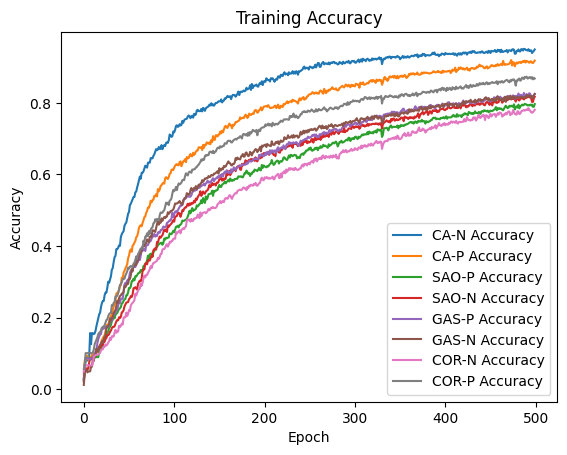

In [ ]:
import matplotlib.pyplot as plt

fig_acc, ax_acc = plt.subplots()

ax_acc.plot(history.history['output_neg_accuracy'], label='CA-N Accuracy')
ax_acc.plot(history.history['output_pos_accuracy'], label='CA-P Accuracy')
ax_acc.plot(history.history['output_sao_pos_accuracy'], label='SAO-P Accuracy')
ax_acc.plot(history.history['output_sao_neg_accuracy'], label='SAO-N Accuracy')
ax_acc.plot(history.history['output_gas_pos_accuracy'], label='GAS-P Accuracy')
ax_acc.plot(history.history['output_gas_neg_accuracy'], label='GAS-N Accuracy')
ax_acc.plot(history.history['output_cor_neg_accuracy'], label='COR-N Accuracy')
ax_acc.plot(history.history['output_cor_pos_accuracy'], label='COR-P Accuracy')

ax_acc.set_xlabel('Epoch')
ax_acc.set_ylabel('Accuracy')
ax_acc.set_title('Training Accuracy')
ax_acc.legend()

plt.show()

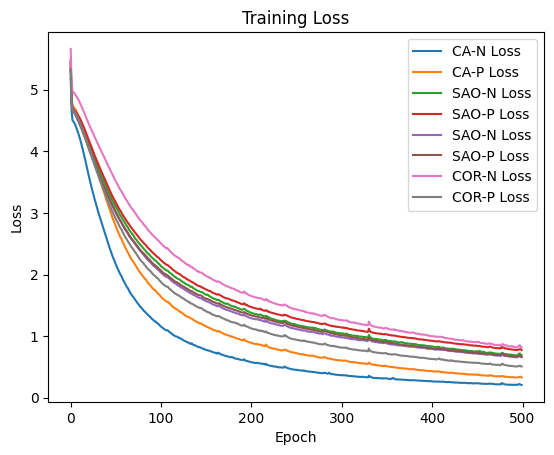

In [ ]:
fig_loss, ax_loss = plt.subplots()

ax_loss.plot(history.history['output_neg_loss'], label='CA-N Loss')
ax_loss.plot(history.history['output_pos_loss'], label='CA-P Loss')
ax_loss.plot(history.history['output_sao_neg_loss'], label='SAO-N Loss')
ax_loss.plot(history.history['output_sao_pos_loss'], label='SAO-P Loss')
ax_loss.plot(history.history['output_gas_neg_loss'], label='SAO-N Loss')
ax_loss.plot(history.history['output_gas_pos_loss'], label='SAO-P Loss')
ax_loss.plot(history.history['output_cor_neg_loss'], label='COR-N Loss')
ax_loss.plot(history.history['output_cor_pos_loss'], label='COR-P Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Training Loss')
ax_loss.legend()

plt.show()

### **Test**

In [ ]:
def generate_feedback_for_category(seed_text, model, tokenizer, max_sequence_len, category_index):
    for _ in range(20):  # Adjust the number of words you want to generate
        # Tokenize the seed text
        seed_sequence = tokenizer.texts_to_sequences([seed_text])[0]
        # Pad the sequence
        padded_sequences = [pad_sequences([seed_sequence], maxlen=max_sequence_len_list[i] - 1, padding='pre') for i in range(8)]

        if category_index == 0:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[0])
        elif category_index == 1:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[1])
        elif category_index == 2:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[2])
        elif category_index == 3:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[3])
        elif category_index == 4:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[4])
        elif category_index == 5:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[5])
        elif category_index == 6:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[6])
        elif category_index == 7:
          predicted_word_index = np.argmax(model.predict([padded_sequences[0], padded_sequences[1], padded_sequences[2], padded_sequences[3], padded_sequences[4], padded_sequences[5], padded_sequences[6], padded_sequences[7]])[7])

        # Convert the index to a word
        predicted_word = tokenizer.index_word.get(predicted_word_index, '')

        # Break if the predicted word is empty (no match found)
        if not predicted_word:
            break
        # Append the predicted word to the seed text
        seed_text += " " + predicted_word

    return seed_text

In [ ]:
max_sequence_len_list = [max_sequence_len_ca_neg, max_sequence_len_ca_pos, max_sequence_len_sao_neg, max_sequence_len_sao_pos, max_sequence_len_gas_neg, max_sequence_len_gas_pos, max_sequence_len_cor_neg, max_sequence_len_cor_pos]

In [ ]:
max_sequence_len_list

[29, 26, 24, 22, 30, 27, 20, 22]

In [ ]:
seed_text = ""

In [ ]:
generated_feedback_neg = generate_feedback_for_category(seed_text, model, tokenizer_content_analysis_neg, max_sequence_len_list, 0)
print("Content Analysis Negatif Feedback:", generated_feedback_neg)

1/1 [==============================] - 0s 47ms/step
Content Analysis Negatif Feedback:  analisis esaimu perlu lebih tajam dan mendalam dengan menggunakan pendekatan yang lebih kritis dan menyeluruh terhadap materi yang dibahas anda


In [ ]:
generated_feedback_pos = generate_feedback_for_category(seed_text, model, tokenizer_content_analysis_pos, max_sequence_len_list, 1)
print("Content Analysis Positive Feedback:", generated_feedback_pos)

1/1 [==============================] - 0s 74ms/step
Content Analysis Positive Feedback:  dan referensi yang kaya pada pembahasan dan menyampaikan menciptakan suasana esaimu sangat mengesankan penggunaan menambah kredibilitas kaya dan menyajikannya tulisan


In [ ]:
generated_feedback_sao_neg = generate_feedback_for_category(seed_text, model, tokenizer_structure_and_organization_neg, max_sequence_len_list, 2)
print("Structure and Organization Negatif Feedback:", generated_feedback_sao_neg)

1/1 [==============================] - 0s 50ms/step
Structure and Organization Negatif Feedback:  tidak kalimat membuat esai tidak teratur dan tidak teratur dan tidak teratur dalam membaca dan sistematis sehingga pembaca dapat mengikuti


In [ ]:
generated_feedback_sao_pos = generate_feedback_for_category(seed_text, model, tokenizer_structure_and_organization_pos, max_sequence_len_list, 3)
print("Structure and Organization Positive Feedback:", generated_feedback_sao_pos)

1/1 [==============================] - 0s 49ms/step
Structure and Organization Positive Feedback:  yang efektif dan organisasi tulisan sangat pembaca pada pembaca dapat mengikuti argumentasi dengan lancar gagasan dengan mudah dengan baik pembaca


In [ ]:
generated_feedback_gas_pos = generate_feedback_for_category(seed_text, model, tokenizer_language_and_grammar_pos, max_sequence_len_list, 5)
print("Language and Grammar Positive Feedback:", generated_feedback_gas_pos)

1/1 [==============================] - 0s 49ms/step
Language and Grammar Positive Feedback:  bahasa yang digunakan sangat bersih dan profesional memberikan kesan kelayakan dan kredibilitas pada tulisanmu dalam penyampian alur argumen sangat sangat


In [ ]:
generated_feedback_gas_neg = generate_feedback_for_category(seed_text, model, tokenizer_language_and_grammar_neg, max_sequence_len_list, 4)
print("Language and Grammar Negatif Feedback:", generated_feedback_gas_neg)

1/1 [==============================] - 0s 91ms/step
Language and Grammar Negatif Feedback:  tata bahasa dan ejaan merusak kejelasan tulisan menciptakan hambatan kejelasan tulisan menyulitkan pembaca untuk mengikuti alur argumentasi rapihkan struktur kalimat


In [ ]:
generated_feedback_cor_pos = generate_feedback_for_category(seed_text, model, tokenizer_content_relevance_pos, max_sequence_len_list, 7)
print("Content Relevance Positive Feedback:", generated_feedback_cor_pos)

1/1 [==============================] - 0s 48ms/step
Content Relevance Positive Feedback:  dapat merasakan keterkaitan yang kuat antara struktur konten dan ilustrasi kesan atau menjawab pertanyaan yang terkait dengan yang dibahas dan


In [ ]:
seed_text = "Relevasi dengan Konten: Esaimu"
generated_feedback_cor_neg = generate_feedback_for_category(seed_text, model, tokenizer_content_relevance_neg, max_sequence_len_list, 6)
print("Content Relevance Negatif Feedback:", generated_feedback_cor_neg)

1/1 [==============================] - 0s 59ms/step
Content Relevance Negatif Feedback: Relevasi dengan Konten: Esaimu tidak memberikan gambaran yang cukup bagi kontribusi yang jelas pada rincian yang diajukan dalam menyampaikan pesan konkret dengan menjauh tulisan


In [ ]:
from keras.models import load_model
from gensim.models import Word2Vec
import nltk
nltk.download('stopwords')
import numpy as np
import re
from nltk.corpus import stopwords

word2vec_model = Word2Vec.load('word2vecmodel.bin')
stop_words = set(stopwords.words('english'))

num_features = word2vec_model.vector_size

def sent2word(x):
    x = re.sub("[^A-Za-z]", " ", x)
    x = x.lower()
    filtered_sentence = [w for w in x.split() if w.lower() not in stop_words]
    return filtered_sentence

def makeVec(words, model, num_features):
    vec = np.zeros((num_features,), dtype="float32")
    noOfWords = 0.
    for w in words:
        if w in model.wv.index_to_key:
            noOfWords += 1
            vec = np.add(vec, model.wv[w])
    if noOfWords != 0:
        vec = np.divide(vec, noOfWords)
    return vec

user_input = "Your input essay goes here."

user_input_words = sent2word(user_input)
user_input_vec = makeVec(user_input_words, word2vec_model, num_features)
user_input_vec = np.reshape(user_input_vec, (1, 1, num_features))

lstm_model = load_model('aes_model.h5')

predicted_scores = lstm_model.predict([user_input_vec, user_input_vec, user_input_vec, user_input_vec])
predicted_scores = np.array(predicted_scores)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


KeyError: 'Unable to open object (bad heap free list)'

In [ ]:
dimension_1_score = predicted_scores[0]
dimension_2_score = predicted_scores[1]
dimension_3_score = predicted_scores[2]
dimension_4_score = predicted_scores[3]

In [ ]:
print(f"Dimension 1 Score: {dimension_1_score}")
print(f"Dimension 2 Score: {dimension_2_score}")
print(f"Dimension 3 Score: {dimension_3_score}")
print(f"Dimension 4 Score: {dimension_4_score}")

In [ ]:
if dimension_1_score >= 2:
  generated_feedback_sao_pos = generate_feedback_for_category(seed_text, model, tokenizer_structure_and_organization_pos, max_sequence_len_list, 3)
  print("Structure and Organization Positive Feedback:", generated_feedback_sao_pos)
elif dimension_1_score < 2:
  generated_feedback_sao_neg = generate_feedback_for_category(seed_text, model, tokenizer_structure_and_organization_neg, max_sequence_len_list, 2)
  print("Structure and Organization Negatif Feedback:", generated_feedback_sao_neg)

In [ ]:
if dimension_2_score >= 2:
  generated_feedback_pos = generate_feedback_for_category(seed_text, model, tokenizer_content_analysis_pos, max_sequence_len_list, 1)
  print("Content Analysis Positive Feedback:", generated_feedback_pos)
elif dimension_2_score < 2:
  generated_feedback_neg = generate_feedback_for_category(seed_text, model, tokenizer_content_analysis_neg, max_sequence_len_list, 0)
  print("Content Analysis Negatif Feedback:", generated_feedback_neg)

In [ ]:
if dimension_3_score >= 2:
  generated_feedback_gas_pos = generate_feedback_for_category(seed_text, model, tokenizer_language_and_grammar_pos, max_sequence_len_list, 5)
  print("Language and Grammar Positive Feedback:", generated_feedback_gas_pos)
elif dimension_3_score < 2:
  generated_feedback_gas_neg = generate_feedback_for_category(seed_text, model, tokenizer_language_and_grammar_neg, max_sequence_len_list, 4)
  print("Language and Grammar Negatif Feedback:", generated_feedback_gas_neg)

In [ ]:
if dimension_4_score >= 2:
  generated_feedback_cor_pos = generate_feedback_for_category(seed_text, model, tokenizer_content_relevance_pos, max_sequence_len_list, 7)
  print("Content Relevance Positive Feedback:", generated_feedback_cor_pos)
elif dimension_4_score < 2:
  generated_feedback_cor_neg = generate_feedback_for_category(seed_text, model, tokenizer_content_relevance_neg, max_sequence_len_list, 6)
  print("Content Relevance Negatif Feedback:", generated_feedback_cor_neg)